<a href="https://colab.research.google.com/github/tajrink/cisc-3440/blob/main/Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [ ]:
def plot_decision_boundary(clf, X, y):
  """
    This function plots the decision boundary produced by a classifier.
    It was adapted from this code:
    https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

    Arguments:
      - clf: A trained classifier model
      - X: A dataset NumPy array with two features, typically your
            training set.
      - y: Corresponding class labels
  """
  h=.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.figure(figsize=(10,10))
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm)
  plt.show()

In [ ]:
penguins = pd.read_csv('https://raw.githubusercontent.com/CUNY-CISC3440-Fall2022/datasets/main/penguins.csv')

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
penguins.shape

(344, 8)

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [ ]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [ ]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [ ]:
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
penguins=penguins.dropna()

In [ ]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [ ]:
penguins.shape

(333, 8)

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [ ]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [ ]:
penguins=penguins.drop(['island','year','sex','flipper_length_mm','body_mass_g'],axis=1)

In [ ]:
penguins.head()

,species,bill_length_mm,bill_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
4,Adelie,36.7,19.3
5,Adelie,39.3,20.6


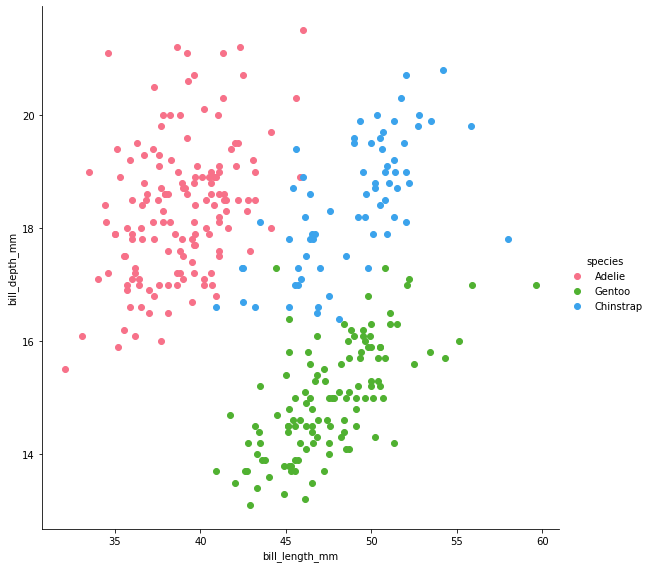

In [ ]:
sns.FacetGrid(penguins, hue="species", palette="husl", height=8) \
.map(plt.scatter, "bill_length_mm", "bill_depth_mm") \
.add_legend() 
plt.show()

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         333 non-null    object 
 1   bill_length_mm  333 non-null    float64
 2   bill_depth_mm   333 non-null    float64
dtypes: float64(2), object(1)
memory usage: 10.4+ KB


In [ ]:
penguins['species']=penguins['species'].replace(['Adelie','Gentoo'],[0,0])
penguins['species']=penguins['species'].replace(['Chinstrap'],1)

In [ ]:
penguins.species.value_counts()

0    265
1     68
Name: species, dtype: int64

In [ ]:
penguins.head()

,species,bill_length_mm,bill_depth_mm
0,0,39.1,18.7
1,0,39.5,17.4
2,0,40.3,18.0
4,0,36.7,19.3
5,0,39.3,20.6


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         333 non-null    int64  
 1   bill_length_mm  333 non-null    float64
 2   bill_depth_mm   333 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 10.4 KB


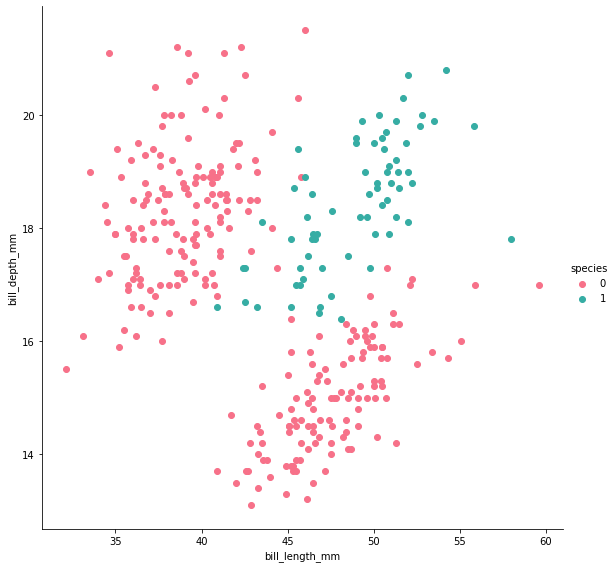

In [ ]:
sns.FacetGrid(penguins, hue="species", palette="husl", height=8) \
.map(plt.scatter, "bill_length_mm", "bill_depth_mm") \
.add_legend() 
plt.show()

In [ ]:
#test train
from sklearn.model_selection import train_test_split

X=penguins.drop('species',axis=1)
y=penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
X_train

,bill_length_mm,bill_depth_mm
274,45.2,14.8
325,49.8,17.3
42,36.0,18.5
302,50.5,18.4
23,38.2,18.1
...,...,...
76,40.9,16.8
138,37.0,16.5
300,46.7,17.9
115,42.7,18.3


In [ ]:
X_train=np.array(X_train)

In [ ]:
y_train

274    0
325    1
42     0
302    1
23     0
      ..
76     0
138    0
300    1
115    0
183    0
Name: species, Length: 266, dtype: int64

In [ ]:
y_train=np.array(y_train)

In [ ]:
# Create an outlier in the training data
X_train[0,0] = 3
X_train[0,1] =0.5

In [ ]:
#grid search

param_grid = {'C': [1, 10, 100], 'gamma': [1,0.1,0.01],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.1)


In [ ]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
print(grid.best_score_)

In [ ]:
#support vector classifier with rbf kernal

clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=0.1, C=1))
])
clf.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=1, gamma=0.1))])

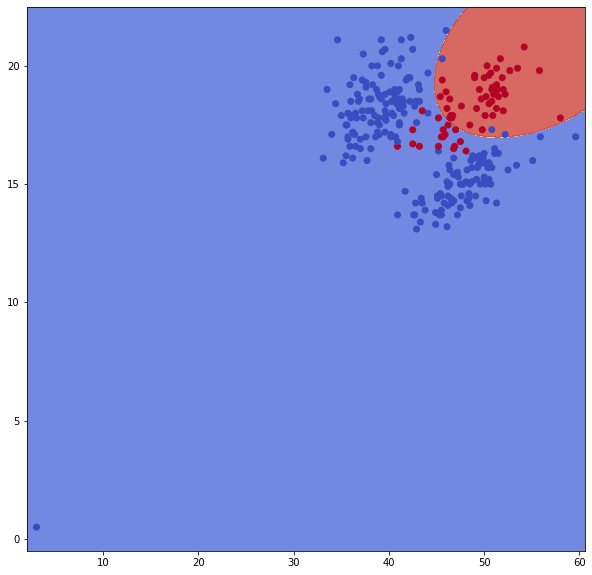

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.7999999999999999

In [ ]:
plot_decision_boundary(clf, X_train, y_train)
f1_score(clf.predict(X_test), y_test)

In [ ]:
#grid search

param_grid = {'C': [1, 10, 100], 'gamma': [1,0.1,0.01],'kernel': ['poly']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   2.1s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   1.4s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   4.7s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   1.5s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   7.6s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   1.1s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   1.8s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.9s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   1.4s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['poly']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.1, kernel='poly')


In [ ]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}


In [ ]:
print(grid.best_score_)

In [ ]:
#support vector classifier with polynomial kernal

clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=100))
])

clf.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=100, coef0=1, kernel='poly'))])

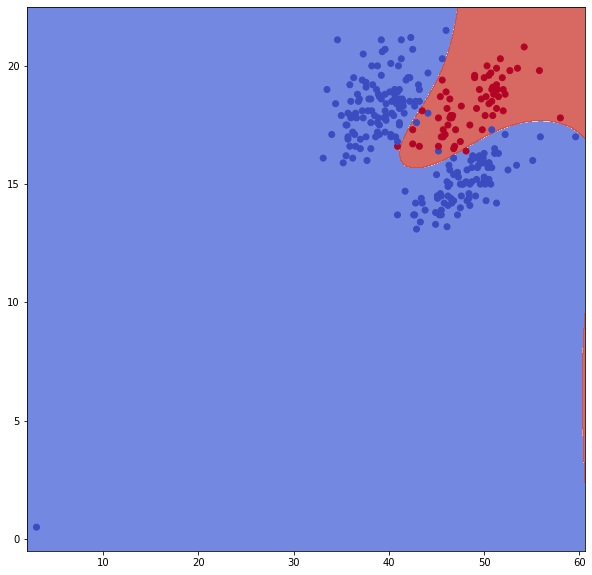

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.8750000000000001

In [ ]:
plot_decision_boundary(clf, X_train, y_train)
f1_score(clf.predict(X_test), y_test)

In [ ]:
#decision tree
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
param_grid = {"max_depth":range(1,10) ,
              "criterion":['gini','entropy'],
              "min_samples_leaf":range(1,10)}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
grid.fit(X_train,y_train)



GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10)})

In [ ]:
print(grid.best_estimator_)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)


In [ ]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}


In [ ]:
print(grid.best_score_)

0.9510132774283718


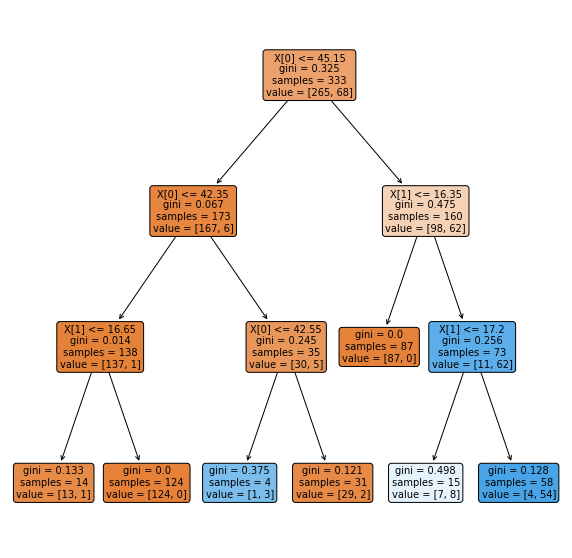

In [ ]:

plt.figure(figsize=(10,10))
plot_tree(
  clf,
  #feature_names=penguins,
  #class_names=penguins.target_name,
  rounded=True,
  filled=True
)
plt.show()